#  **Machine Learning Assignment (AUEB 2023-2024)**  
## **7. k-means clustering**


---



*Yorgos Velissaridis P3210255*

*Evangelos Kleidopoulos P3190084*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Lastly, we implemented the KMeans algorithm.

It runs for a selected number of clusters, max iterations and convergence tolerance.

The algorithm randomly initializes centroids and then does EM steps until the max iterations or until convergence tolerance is reached.

E-Step: (Assignment Step)

$$\text{Distance} \text{ = }  \sum_{i=1}^{\text{d}}\sqrt{({a_{i} - b_{i}})^2}\text{ , d the number of features}$$

M-Step: (Update of centroids Step)

$$\text{Centroids} \text{ = }  \frac{1}{N}\sum_{i=1}^{\text{N}}x_{i} \text{ , N the number of data points assigned to that centroid}$$

In [6]:
class KM:
    def __init__(self, n_clusters, max_iters=300, tol=1e-4,random_state = np.random.RandomState(0)):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = []
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        # Randomly initialize cluster centroids
        centroids = X[self.random_state.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each point to the nearest centroid
            labels = np.argmin(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2), axis=1)

            # Update centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < self.tol:
                break

            centroids = new_centroids.copy()

        self.labels_ = labels
        self.centroids = centroids

    def predict(self, test):
        # Calculate squared distances between each data point and each centroid
        squared_distances = np.sum((test[:, np.newaxis] - self.centroids) ** 2, axis=2)

        # Find the index of the centroid with the minimum squared distance for each data point
        predicted_labels = np.argmin(squared_distances, axis=1)

        return predicted_labels

    def get_centroids(self):
      return self.centroids

We use the same random state to compare our algorithm to sklearn's.

In [7]:
generator = np.random.RandomState(42)

Training our model and then assigning each data point to a centroid.

We are using a PCA'd version of our dataset with only 2 features in order to be able to plot it.

In [32]:
with open('GTzan_2PCs.csv', newline='') as csv_file:
    data = pd.read_csv(csv_file)

X = data.iloc[:, 1:3].values

kmeans = KM(n_clusters=10, max_iters=500, tol=1e-5, random_state = generator)
kmeans.fit(X)
centroids = kmeans.get_centroids()
labels = kmeans.predict(X)

Repeating the same thing for sklearn's implementations.

In [33]:
from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=10,max_iter=500, tol = 1e-5,init='random',n_init=1,random_state=generator)
sk_kmeans.fit(X)
sk_centroids = sk_kmeans.cluster_centers_
sk_labels = sk_kmeans.predict(X)

Finally, we plot the received clusters side to side from each implementation.

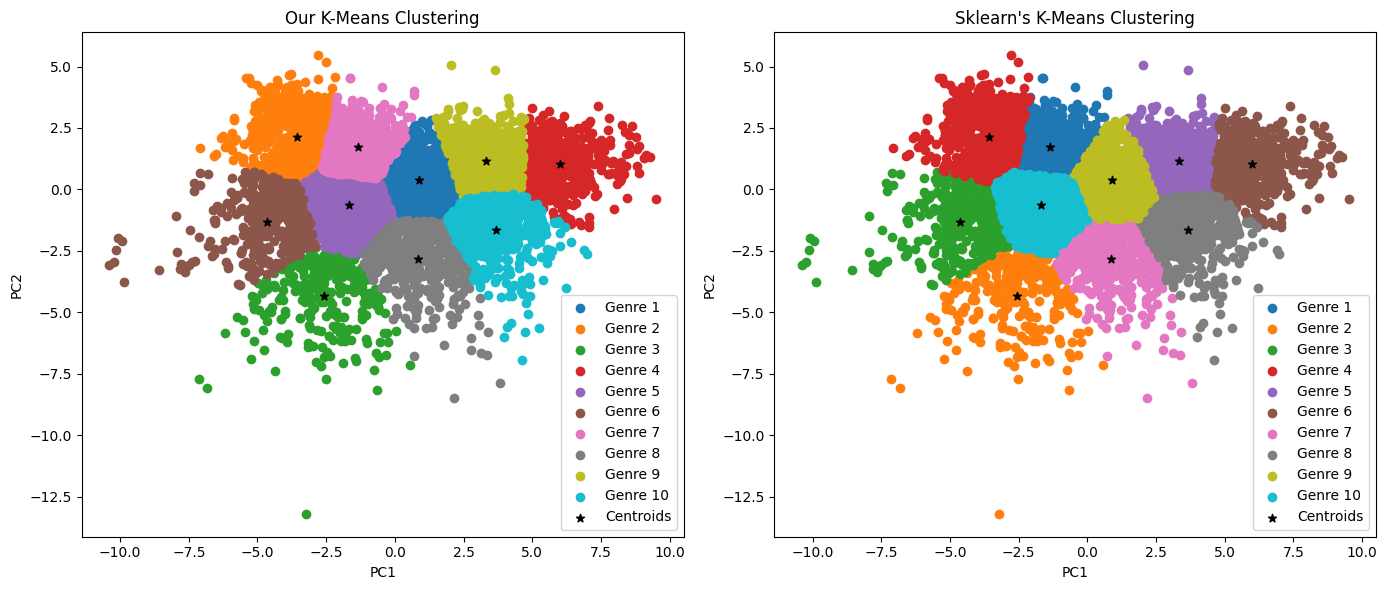

In [34]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first scatterplot
axes[0].set_title('Our K-Means Clustering')

for i in range(10):
    cluster_points = X[labels == i]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Genre {i + 1}')

axes[0].scatter(centroids[:, 0], centroids[:, 1], marker='*', color='black', label='Centroids')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# Plot the second scatterplot
axes[1].set_title("Sklearn's K-Means Clustering")
for i in range(10):
    cluster_points = X[sk_labels == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Genre {i + 1}')

axes[1].scatter(sk_centroids[:, 0], sk_centroids[:, 1], marker='*', color='black', label='Centroids')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()

plt.tight_layout()
plt.show()